## Task-2

## In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Goal:

What will be predicted score if a student study for 9.25 hrs in a day?

# Steps to be involved:
1. Import all required libraries
2. Data acquisition and analysis
3. Visualisation of Data
4. Sorting out the data for Training and Testing
5. Train the date by using Simple Linear Regression
6. Test the data acquired
7. Find Accuracy of the model
8. Predict the results

# Step-1:
Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step-2
Data Acquisition and analysis

In [29]:
student_data = pd.read_csv('http://bit.ly/w-data')
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Shape
student_data.shape

(25, 2)

In [4]:
#info
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# describe
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step-3
Visualisation of Data


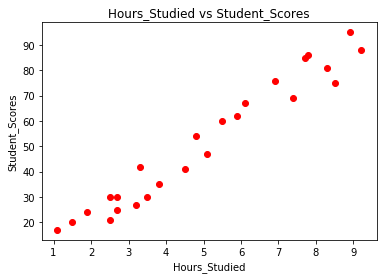

In [7]:
x=student_data['Hours']
y=student_data['Scores']
plt.scatter(x,y,c='r')
plt.title('Hours_Studied vs Student_Scores')
plt.xlabel('Hours_Studied')
plt.ylabel('Student_Scores')
plt.show()

In [8]:
# correlation
student_data.corr()
print(student_data.corr())


           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


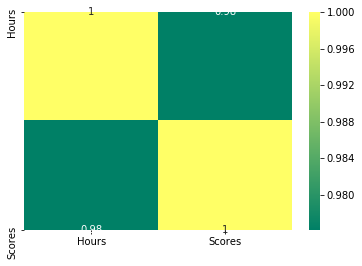

from the heatmap, we can say that correlation between the hours and scores is 98%


In [9]:
sns.heatmap(student_data.corr(),annot=True,cmap='summer')
plt.show()
print('from the heatmap, we can say that correlation between the hours and scores is 98%')

# Step-4
Sorting out the data for Training and Testing

In [10]:
x = student_data.iloc[:,:-1].values
y = student_data.iloc[:,1].values


In [11]:
# Spliting the data for training and testing
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Step-5
Train the date by using Simple Linear Regression algorithm


In [12]:
# Fitting the data in the model
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

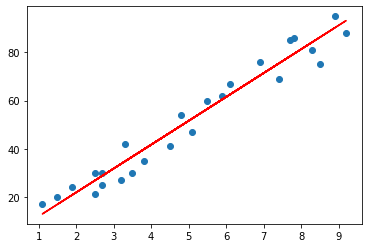

(array([9.91065648]), 2.018160041434683)

In [13]:
# Plotting the Linear regression line
line = model.coef_ * x + model.intercept_

# Plotting for the test data
plt.rcParams['axes.facecolor'] = 'white'
plt.scatter(x, y)
plt.plot(x, line,c='red')
plt.show()
model.coef_,model.intercept_

# Step-6
Test the data acquired

In [14]:
# Predicting the Result
y_pred = model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
# Comparing Actual vs Predicted
pred_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Step-7
find the accuracy of the model

In [24]:
print(f'The train score:  {model.score(x_train,y_train)}')
print(f'The test score:   {model.score(x_test,y_test)}')

The train score:  0.9515510725211553
The test score:   0.9454906892105356


In [25]:
# Calculating the mean absolute error and mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('mean squared error: ', mean_squared_error(y_test,y_pred))
print('mean absolute error: ', mean_absolute_error(y_test,y_pred))

mean squared error:  21.5987693072174
mean absolute error:  4.183859899002975


# Step-8
Predict the Results

In [28]:
# What will be predicted score if a student study for 9.25 hrs in a day? 
hours = [[9.25]]
pred1 = model.predict(hours)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred1))

Number of Hours = [[9.25]]
Predicted Score = [93.69173249]
